In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1) Escribe una función que reciba un dataframe de Pandas con los ingresos y gastos
de una empresa por meses durante un año, y devuelva un diagrama de líneas con
dos líneas, una para los ingresos y otra para los gastos. El diagrama debe tener una
leyenda identificando la línea de los ingresos y la de los gastos, un título con el
nombre “Evolución de ingresos y gastos” y el eje y debe empezar en 0. Genera datos
aleatorios para probar el funcionamiento.

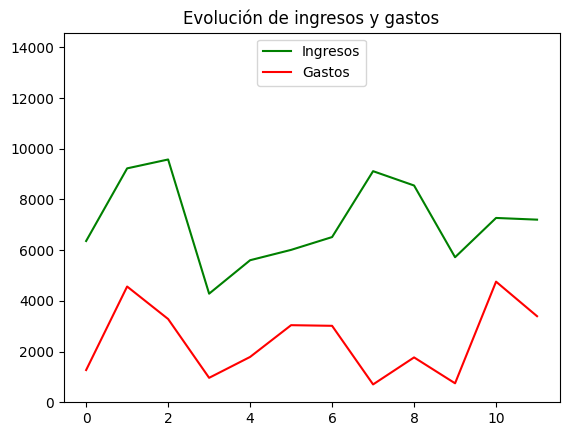

In [3]:
def empresa_evolucion(df):
    X = df['Ingresos']
    Y = df['Gastos']

    plt.plot(X, label='Ingresos', color='green')
    plt.plot(Y, label='Gastos', color='red')
    plt.ylim(0, max(X.max(), Y.max()) + 5000)
    plt.legend(loc='upper center')
    plt.title('Evolución de ingresos y gastos')

df_empresa = pd.DataFrame({
    'Mes': np.arange(1, 13),
    'Ingresos': np.random.randint(1000, 10000, 12),
    'Gastos':   np.random.randint(500, 5000, 12) 
})

empresa_evolucion(df_empresa)

2) Escribe una función que reciba una serie de Pandas con las notas de los alumnos
de un módulo cualquiera (generadas aleatoriamente o inventadas) y devuelva un
diagrama de caja. El diagrama debe tener el título “Distribución de notas”. Luego
debes conseguir pasarle un dataframe con las notas de 4 módulos diferentes y, en
la misma zona, mostrar las cajas de la distribución de los 4 módulos.

C:\Users\ESP\AppData\Local\Temp\ipykernel_6608\618542198.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.values, labels=['Notas'])


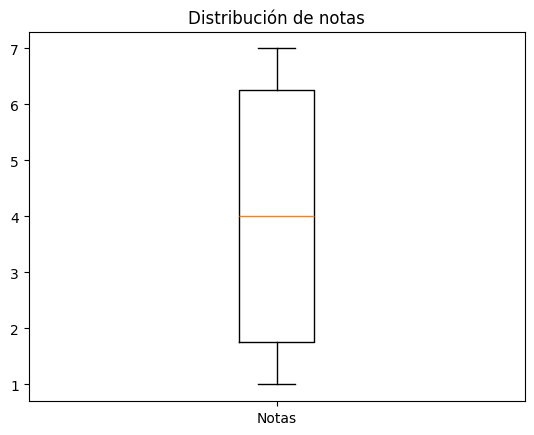

C:\Users\ESP\AppData\Local\Temp\ipykernel_6608\618542198.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.values, labels=df.columns)


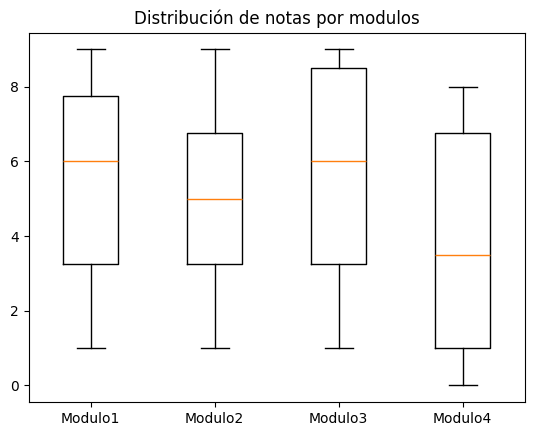

In [25]:
def series_modulos_notas(df):
    if type(df) is pd.Series:
         plt.boxplot(df.values, labels=['Notas'])
         plt.title('Distribución de notas')
         plt.show()
    elif type(df) is pd.DataFrame:
        plt.boxplot(df.values, labels=df.columns)
        plt.title('Distribución de notas por modulos')
        plt.show()
    else:
        print('El dato ingresado no es un DataFrame ni una Serie')
   

notas = pd.Series(np.random.randint(0,10,4), index=['Carlos', 'Ana', 'Juan', 'Maria'])
modulos = pd.DataFrame({
    'Modulo1': np.random.randint(0,10,10),
    'Modulo2': np.random.randint(0,10,10),
    'Modulo3': np.random.randint(0,10,10),
    'Modulo4': np.random.randint(0,10,10)
})

series_modulos_notas(notas)
series_modulos_notas(modulos)

3) Dispones de datos sobre las edades de pacientes en un estudio de predicción de
enfermedades cardíacas, para ello debes generar un conjunto de datos simulado
con 500 edades entre 20 y 80 años, siguiendo una distribución normal. Crea un
histograma para visualizar la distribución de las edades e identifica posibles sesgos,
si los hay. Ponle un formato visualmente más agradable que el estándar.


Edad máxima: 80
Edad mínima: 20


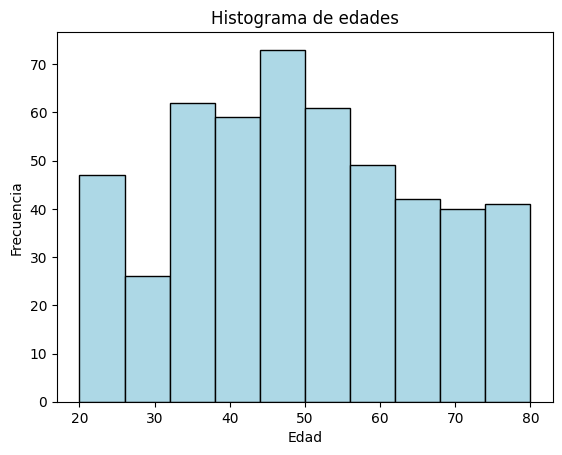

In [35]:

def histograma_edades(data):
    plt.hist(data, bins=10, edgecolor='black', color='lightblue')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de edades')
    plt.show()

edades = np.random.randint(20, 81, 500)
# Calculo distribucion normal
media_edades, desviacion_stand = np.mean(edades), np.std(edades)
edades_dist = np.random.normal(media_edades, desviacion_stand, 500)
edad_limit = np.clip(edades_dist,20,80)
edad_limit_int = edad_limit.astype(int)

# Comprobacion de sesgos
edad_min, edad_max = np.min(edad_limit_int), np.max(edad_limit_int)
print(f'Edad máxima: {edad_max}')
print(f'Edad mínima: {edad_min}')

histograma_edades(edad_limit_int)

4) El fichero titanic.csv contiene información sobre los pasajeros del Titanic. Vamos a
explorar su información mediante representaciones gráficas, para ello, crea un
dataframe con Pandas a partir del CSV, luego, debes generar las siguientes
representaciones independientes (pon título a todas, así como a los ejes X e Y,
intenta cuidar el aspecto de la visualización):
a) Diagrama de sectores con los fallecidos y supervivientes.
b) Histograma con las edades.
c) Diagrama de barras con el número de personas en cada clase.
d) Diagrama de barras con el número de personas fallecidas y supervivientes en
cada clase.
e) Diagrama de barras con el número de personas fallecidas y supervivientes
acumuladas en cada clase.


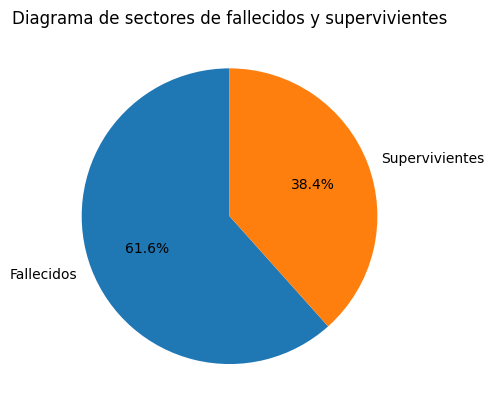

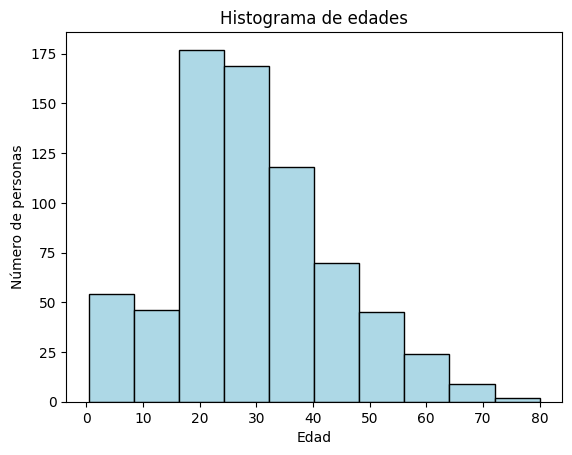

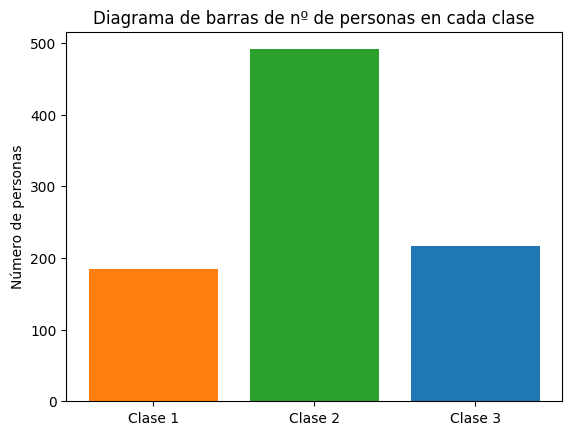

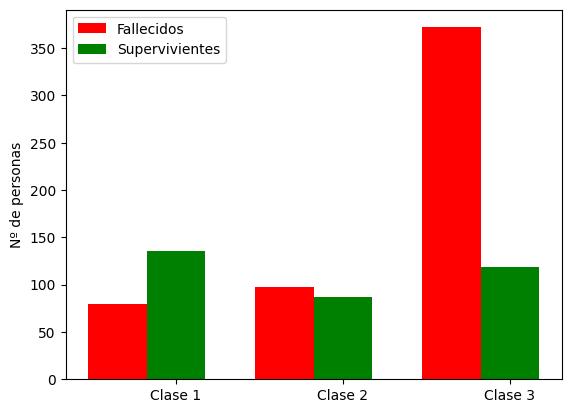

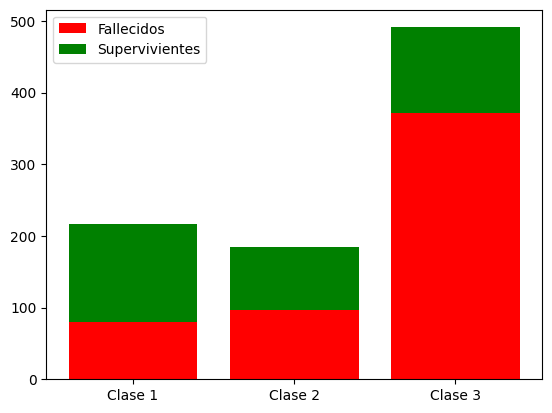

In [24]:
data = pd.read_csv(r'datasets\titanic.csv')

# Verificamos la carga del dataset
# print(data.head())
# print(data.info())
# print(data.describe())

# a) Diagrama de sectores con los fallecidos y supervivientes

fallecidos = data[data['Survived'] == 0]['Survived'].count()
supervivientes = data[data['Survived'] == 1]['Survived'].count()
clases_array = ['Clase 1', 'Clase 2', 'Clase 3']

labels = 'Fallecidos', 'Supervivientes'
sizes = [fallecidos, supervivientes]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Diagrama de sectores de fallecidos y supervivientes')
plt.show()

# b) Histograma con las edades

plt.hist(data['Age'], bins=10, edgecolor='black', color='lightblue')
plt.xlabel('Edad')
plt.ylabel('Número de personas')
plt.title('Histograma de edades')
plt.show()

# c) Diagrama de barras con el número de personas en cada clase

clases = data['Pclass'].unique()
clases_sorted = np.sort(clases)
clase1 = data[data['Pclass']==1]['Pclass'].count()
clase2 = data[data['Pclass']==2]['Pclass'].count()
clase3 = data[data['Pclass']==3]['Pclass'].count()
total_personas = data['Pclass'].count()

plt.bar(clases[0], clase1)
plt.bar(clases[1], clase2)
plt.bar(clases[2], clase3)
plt.xticks(clases_sorted,clases_array)
plt.ylabel('Número de personas')
plt.title('Diagrama de barras de nº de personas en cada clase')
plt.show()

# e) Diagrama de barras de nº de personas fallecida y supervivientes en cada clase 
bar_with = 0.35

fallecidos_clase1 = data[(data['Pclass']==1) & (data['Survived']==0)]['Survived'].count()
supervivientes_clase1 = data[(data['Pclass']==1) & (data['Survived']==1)]['Survived'].count()

fallecidos_clase2 = data[(data['Pclass']==2) & (data['Survived']==0)]['Survived'].count()
supervivientes_clase2 = data[(data['Pclass']==2) & (data['Survived']==1)]['Survived'].count()

fallecidos_clase3 = data[(data['Pclass']==3) & (data['Survived']==0)]['Survived'].count()
supervivientes_clase3 = data[(data['Pclass']==3) & (data['Survived']==1)]['Survived'].count()


plt.bar(clases_sorted[0] - bar_with, fallecidos_clase1, width=bar_with, color='red')
plt.bar(clases_sorted[0], supervivientes_clase1, width=bar_with, color='green')

plt.bar(clases_sorted[1] - bar_with, fallecidos_clase2, width=bar_with, color='red')
plt.bar(clases_sorted[1], supervivientes_clase2, width=bar_with, color='green')

plt.bar(clases_sorted[2] - bar_with, fallecidos_clase3, width=bar_with, color='red')
plt.bar(clases_sorted[2], supervivientes_clase3, width=bar_with, color='green')

plt.legend(['Fallecidos', 'Supervivientes'])
plt.xticks(clases_sorted, ['Clase 1', 'Clase 2', 'Clase 3'])
plt.ylabel('Nº de personas')
plt.show()

# d) Diagrama de barras con el número de personas fallecidas y supervivientes acumulados en cada clase
plt.bar(clases_sorted[0], fallecidos_clase1, color='r')
plt.bar(clases_sorted[0], supervivientes_clase1, bottom=fallecidos_clase1, color='g')

plt.bar(clases_sorted[1], fallecidos_clase2, color='r')
plt.bar(clases_sorted[1], supervivientes_clase2, bottom=fallecidos_clase2, color='g')

plt.bar(clases_sorted[2], fallecidos_clase3, color='r')
plt.bar(clases_sorted[2], supervivientes_clase3, bottom=fallecidos_clase3, color='g')

plt.legend(['Fallecidos', 'Supervivientes'], loc='upper left')
plt.xticks(clases_sorted, ['Clase 1', 'Clase 2', 'Clase 3'])
plt.show()





5) Durante el entrenamiento de una red neuronal, se registró la pérdida (loss) en cada
una de las 50 épocas usadas. Simula estos valores usando una función exponencial
decreciente. Representa la evolución de la pérdida en un gráfico de líneas y destaca
la tendencia general. Se adjunta modelo de referencia de la exponencial decreciente,
donde x es la época:

𝑦(𝑥) = 𝑒
−0.1·x

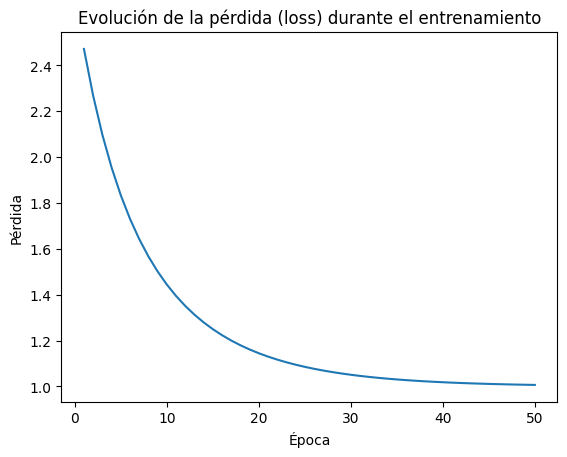

In [39]:

# Generamos los valores para X (índices de épocas) y Y (valores de pérdida)
array_epocas = np.arange(1, 51)
CONSTANT_E = 2.718281828459045  # constante euleriana
array_loss = np.exp(CONSTANT_E ** (-0.1 * array_epocas))

# Representamos la evolución de la pérdida en un gráfico de líneas
plt.plot(array_epocas, array_loss)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida (loss) durante el entrenamiento')
plt.show()